## ML Regression Model

In [1]:
# Conventional way to import pandas
import pandas as pd

In [5]:
# Read cvs file directly from a URL and save the result
data= pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

# Display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Check the shape of the Dataframe (rows,columns)
data.shape

(200, 5)

## Visualizing data using seaborn

In [6]:
# Conventional way to import seaborn
import seaborn as sns

# Allow plots to appear within the notebook
%matplotlib inline

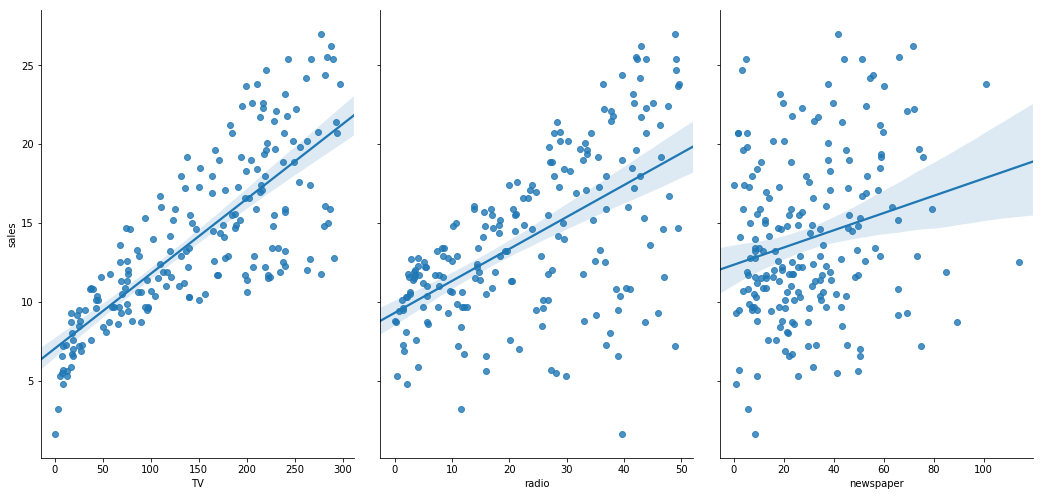

In [10]:
# Visualise the relationship between features and response using scatterplots
sns.pairplot(data,x_vars=['TV','radio','newspaper'], y_vars='sales',size=7,aspect=0.7,kind='reg')

## Preparing X and y using pandas
   - Scikit-learn expects X(feature matrix) and y(response vector) to be NumPy arrays.
   - However, pandas is built on top of NumPy
   - Thus,X can be a pandas DataFrame and y can be a pandas Series.

In [11]:
# Create a Python list of feature names
feature_cols=['TV','radio','newspaper']

# Use the list to select a subset of original DataFrame
X=data[feature_cols]

# Equivalent command to do this in one line
X=data[['TV','radio','newspaper']]

# Print first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
# Check type and shape of X
print(type(X))
X.shape

<class 'pandas.core.frame.DataFrame'>


(200, 3)

In [14]:
# Select a Series from the DataFrame
y=data['sales']

# Equivalent command
y=data.sales

# Print first 5 rows
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [15]:
# Check type and shape of y
print(type(y))
y.shape

<class 'pandas.core.series.Series'>


(200,)

## Splitting X and y into training and testing data sets

In [17]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [18]:
# Default split is 75% for training and 25% for testing
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [19]:
# Import model
from sklearn.linear_model import LinearRegression

# Instantiate 
linreg=LinearRegression()

# Fit the model to the training data
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Interpreting model coefficient

In [20]:
# Print the intercept and coefficient 
print (linreg.intercept_)
print (linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [22]:
# Pair the feature names with coefficients
print(list(zip(feature_cols,linreg.coef_)))

[('TV', 0.04656456787415029), ('radio', 0.17915812245088836), ('newspaper', 0.0034504647111804065)]


## Making predictions

In [23]:
# Make predictions on testing set
y_pred=linreg.predict(X_test)

## Model evaluation metrics for regression
   - Mean absolute error
   - Mean squared error
   - Root mean squared error

In [25]:
# Computing the RMSE for our sales predictions
import numpy as np
from sklearn import metrics
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4046514230328953


## Feature selection

In [28]:
# Trying to reduce the RMSE error by removing "newspaper" feature

# Create a Python list of feature names
feature_cols=['TV','radio']

# Use this list to select a subset of the original DataFrame
X=data[feature_cols]

# Selecting a series from a DataFrame
y=data.sales

# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

# Instantiate the model
linreg=LinearRegression()

# Fit the model to the training dataset
linreg.fit(X_train,y_train)

# Precition from testing data
y_pred=linreg.predict(X_test)

# Compute RMSE
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3879034699382886


## Decrease in RMSE, unlikely this feature is useful for predicting sales and should be removed from the model.